In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')



In [42]:
df = pd.read_csv('StudentsPerformance.csv', sep=';')

In [43]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [44]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [45]:
df.shape

(1000, 8)

In [46]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [50]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [52]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg score'] = df['total score'] / 3

In [53]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [54]:
math_gabaritou = df[df['math score'] == 100]['avg score'].count() 
reading_gabaritou = df[df['reading score'] == 100]['avg score'].count() 
writing_gabaritou = df[df['writing score'] == 100]['avg score'].count() 

In [55]:
print(f'O número de alunos que gabaritaram em matemática foi de : {math_gabaritou}')
print(f'O número de alunos que gabaritaram em escrita foi de : {writing_gabaritou}')
print(f'O número de alunos que gabaritaram em leitura foi de : {reading_gabaritou}')

O número de alunos que gabaritaram em matemática foi de : 7
O número de alunos que gabaritaram em escrita foi de : 14
O número de alunos que gabaritaram em leitura foi de : 17


In [56]:
total = len(df)
p_math = (math_gabaritou / total)*100
p_writing = (writing_gabaritou / total)*100
p_reading = (reading_gabaritou / total)*100

In [57]:
print(f'A porcentagem de alunos que gabaritaram em matemática foi de : {p_math:.2f}%')
print(f'A porcentagem de alunos que gabaritaram em escrita foi de : {p_writing:.2f}%')
print(f'A porcentagem de alunos que gabaritaram em leitura foi de : {p_reading:.2f}%')

A porcentagem de alunos que gabaritaram em matemática foi de : 0.70%
A porcentagem de alunos que gabaritaram em escrita foi de : 1.40%
A porcentagem de alunos que gabaritaram em leitura foi de : 1.70%


In [58]:
df_agrupado = df.groupby(by=['gender','race/ethnicity'])['gender'].count()

df_agrupado = pd.DataFrame(df_agrupado)

df_agrupado

gender
gender race/ethnicity        
female group A             36
       group B            104
       group C            180
       group D            129
       group E             69
male   group A             53
       group B             86
       group C            139
       group D            133
       group E             71

In [59]:
df.groupby(by=['gender','race/ethnicity'])[['math score','writing score','reading score']].agg(['mean','count'])

math score       writing score       reading score      
                            mean count          mean count          mean count
gender race/ethnicity                                                         
female group A         58.527778    36     67.861111    36     69.000000    36
       group B         61.403846   104     70.048077   104     71.076923   104
       group C         62.033333   180     71.777778   180     71.944444   180
       group D         65.248062   129     75.023256   129     74.046512   129
       group E         70.811594    69     75.536232    69     75.840580    69
male   group A         63.735849    53     59.150943    53     61.735849    53
       group B         65.930233    86     60.220930    86     62.848837    86
       group C         67.611511   139     62.712230   139     65.424460   139
       group D         69.413534   133     65.413534   133     66.135338   133
       group E         76.746479    71     67.394366    71     70.295775    71

In [60]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

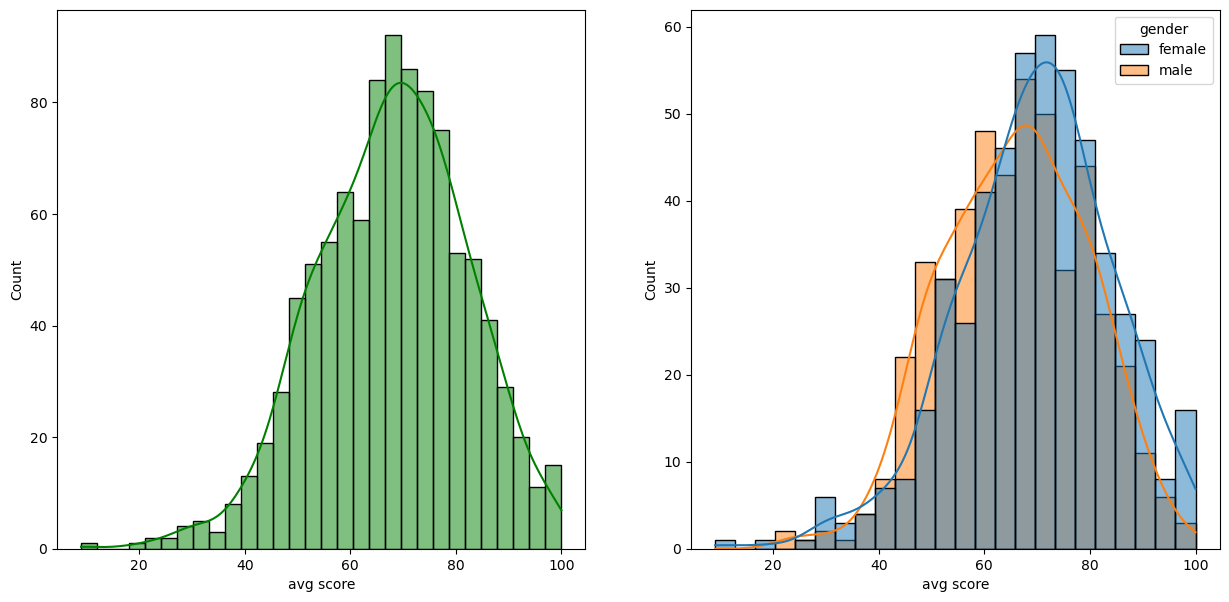

In [61]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='avg score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='avg score', kde=True, hue='gender')
plt.show()

In [62]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [63]:
df_female = df[df['gender'] == 'female']
df_male = df[df['gender'] == 'male']

df_female.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,518.0,63.633205,15.491453,0.0,54.000000,65.000000,74.000000,100.0
reading score,518.0,72.608108,14.378245,17.0,63.250000,73.000000,83.000000,100.0
writing score,518.0,72.467181,14.844842,10.0,64.000000,74.000000,82.000000,100.0
total score,518.0,208.708494,43.625427,27.0,182.000000,211.000000,236.000000,300.0
avg score,518.0,69.569498,14.541809,9.0,60.666667,70.333333,78.666667,100.0


In [64]:
df_male.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,482.0,68.728216,14.356277,27.0,59.0,69.000000,79.00,100.0
reading score,482.0,65.473029,13.931832,23.0,56.0,66.000000,75.00,100.0
writing score,482.0,63.311203,14.113832,15.0,53.0,64.000000,73.75,100.0
total score,482.0,197.512448,41.096520,69.0,168.0,199.000000,228.75,300.0
avg score,482.0,65.837483,13.698840,23.0,56.0,66.333333,76.25,100.0


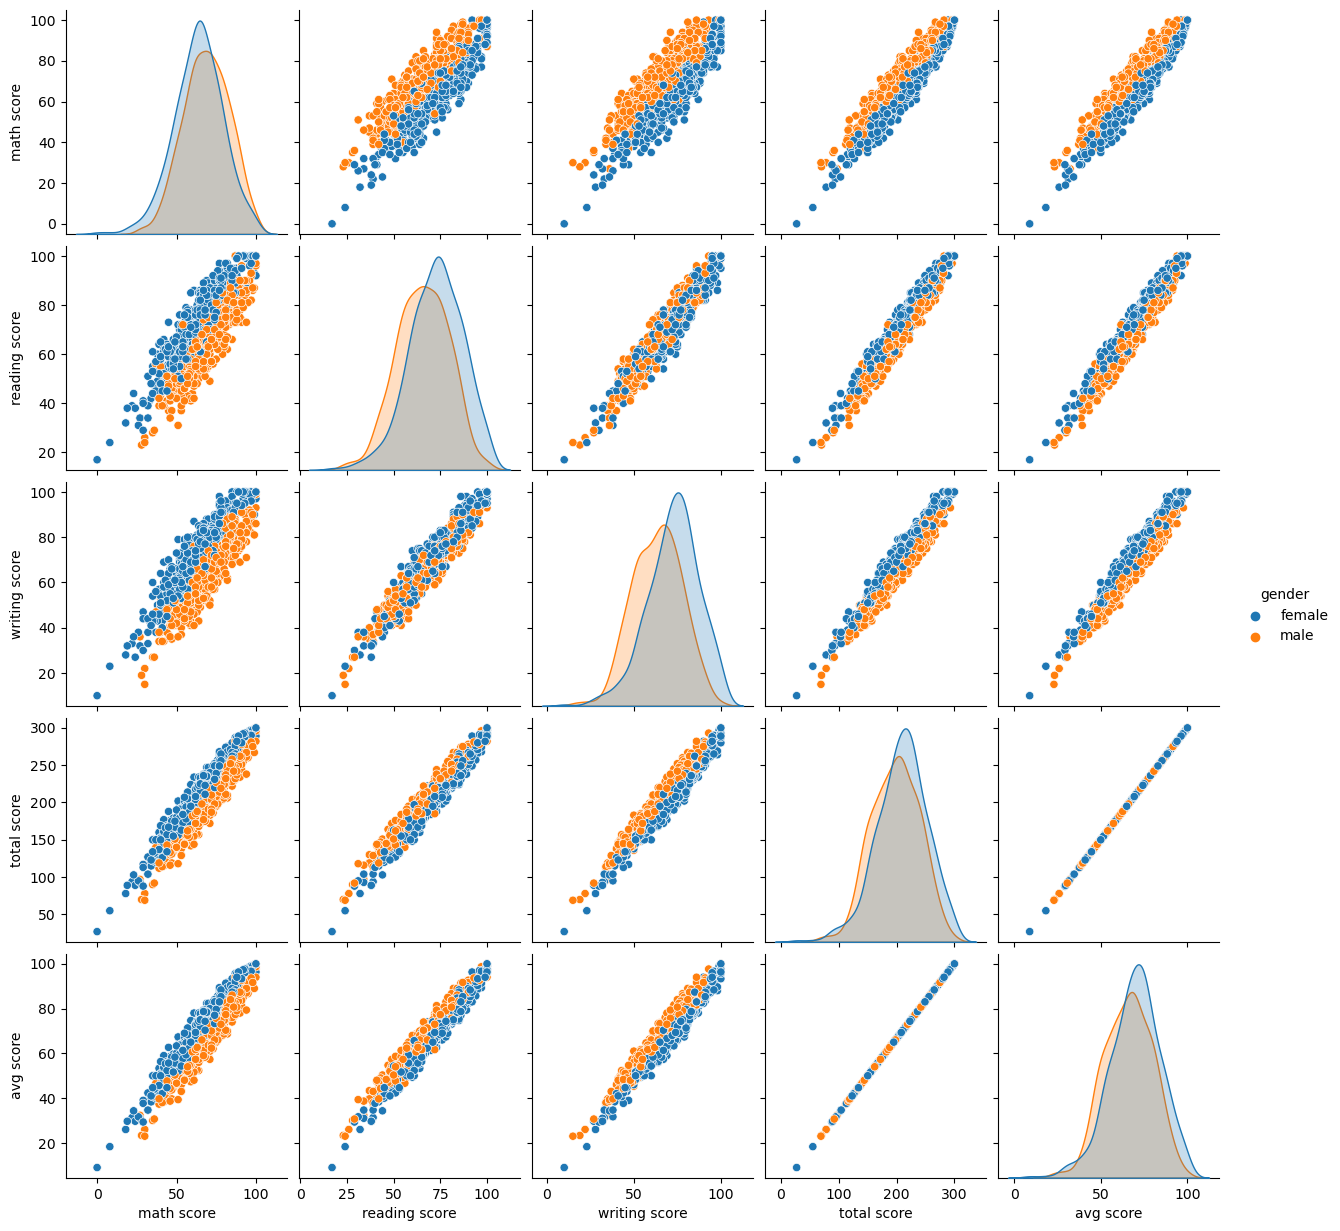

In [65]:
sns.pairplot(df, hue='gender')

<Axes: >

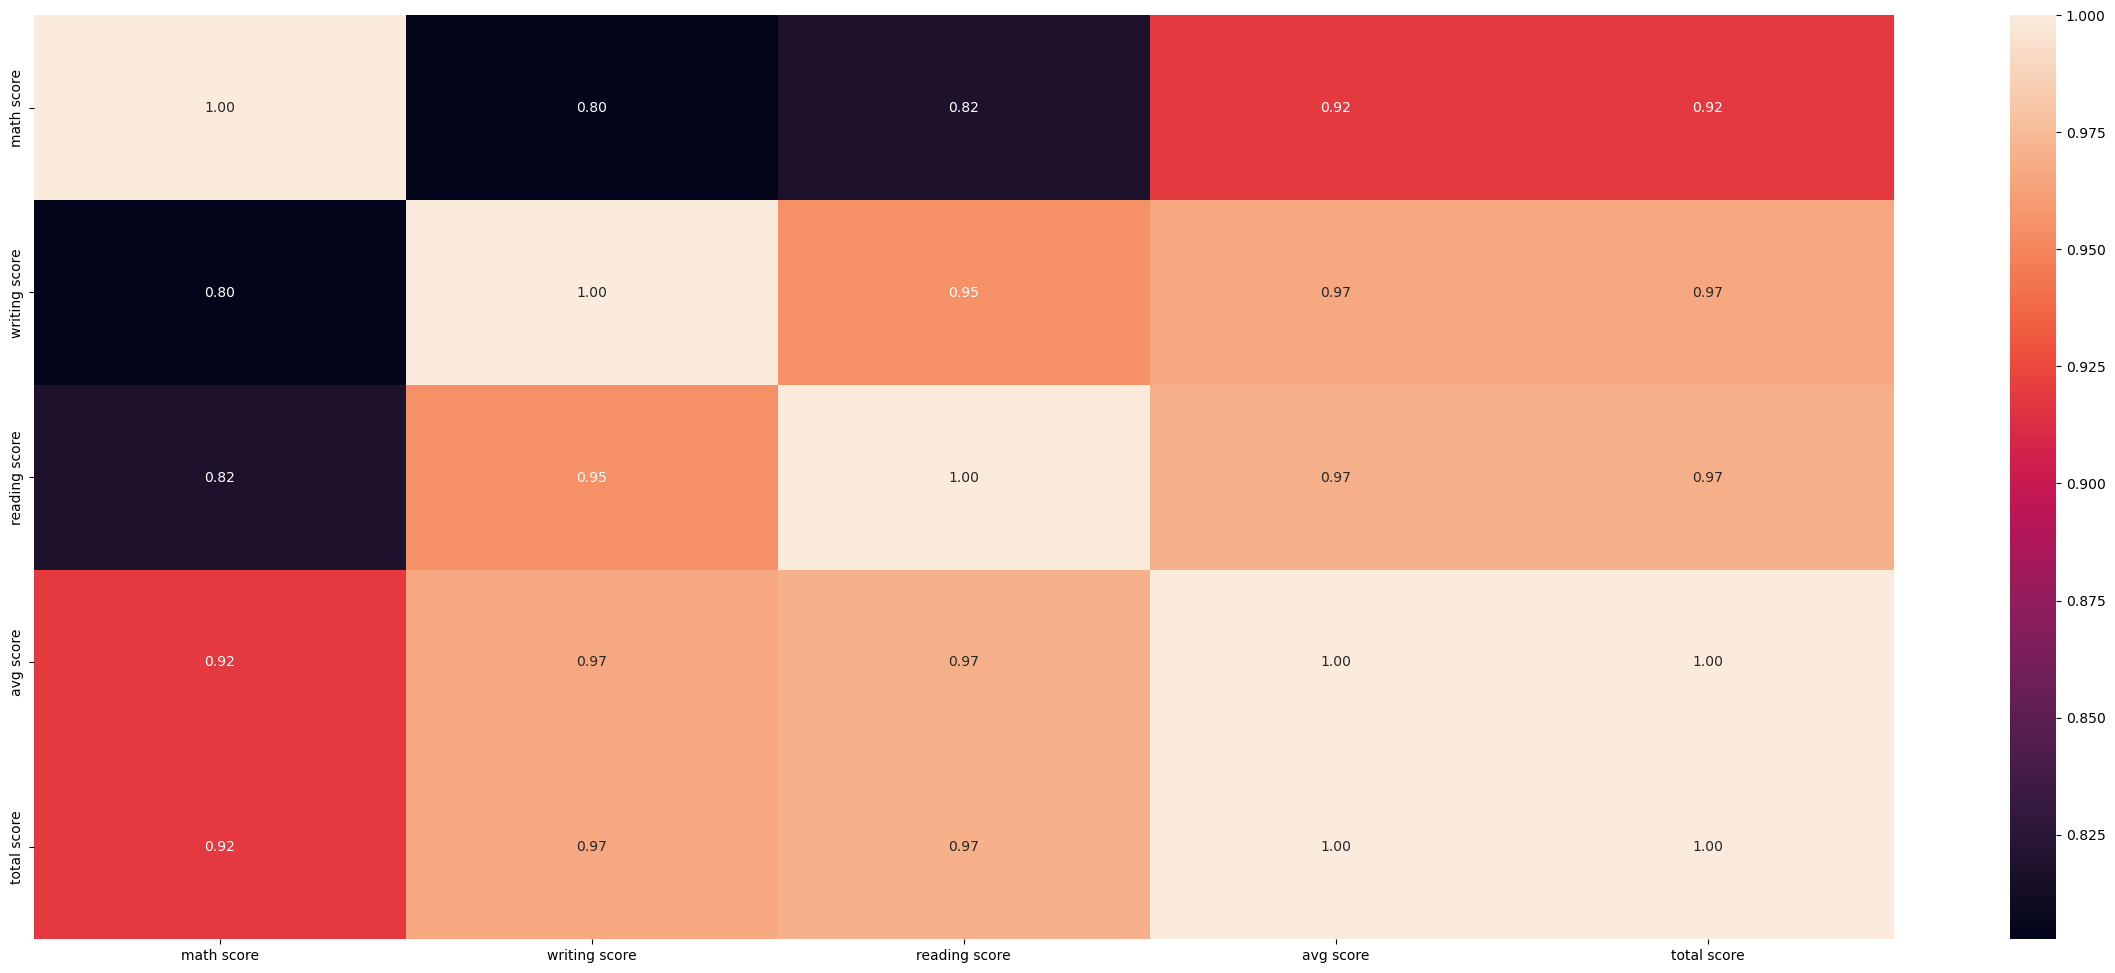

In [66]:
sns.heatmap(df[['math score','writing score','reading score','avg score','total score']].corr(), annot=True, fmt='.2f')

In [67]:
table = pd.pivot_table(df, values='avg score', index=['gender','race/ethnicity'], columns=['test preparation course'], aggfunc='mean')

table

test preparation course  completed       none
gender race/ethnicity                        
female group A           73.777778  60.805556
       group B           70.542857  65.971014
       group C           74.082126  65.168168
       group D           75.174242  69.505882
       group E           80.250000  70.762963
male   group A           67.719298  58.088235
       group B           70.747475  58.176101
       group C           68.687500  63.435897
       group D           71.631579  65.129825
       group E           74.324074  68.552381

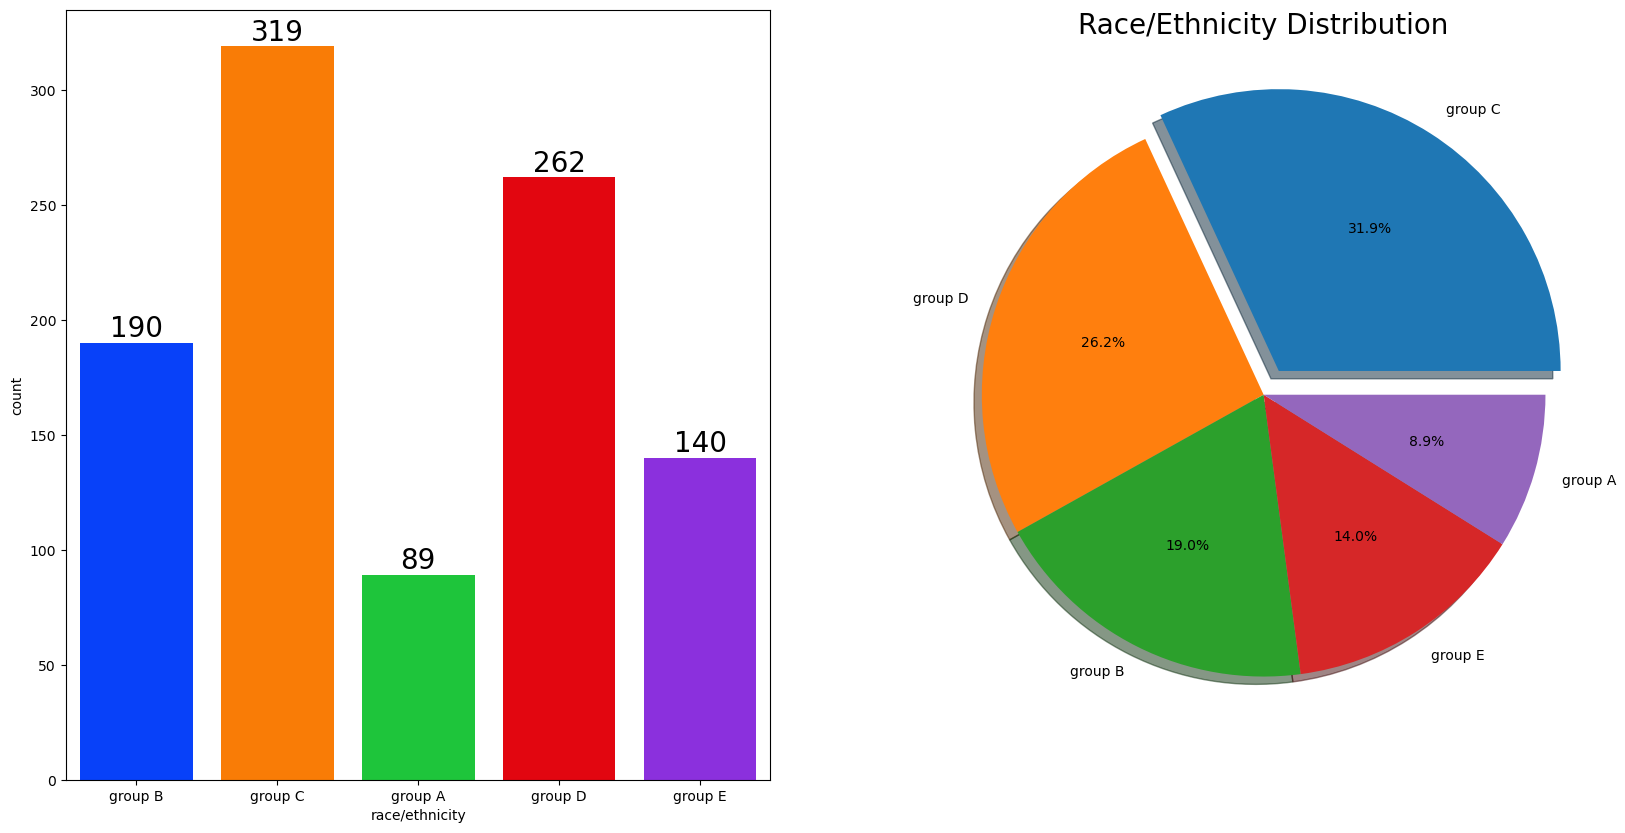

In [68]:

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.title('Race/Ethnicity Distribution', fontsize=20)

plt.show()

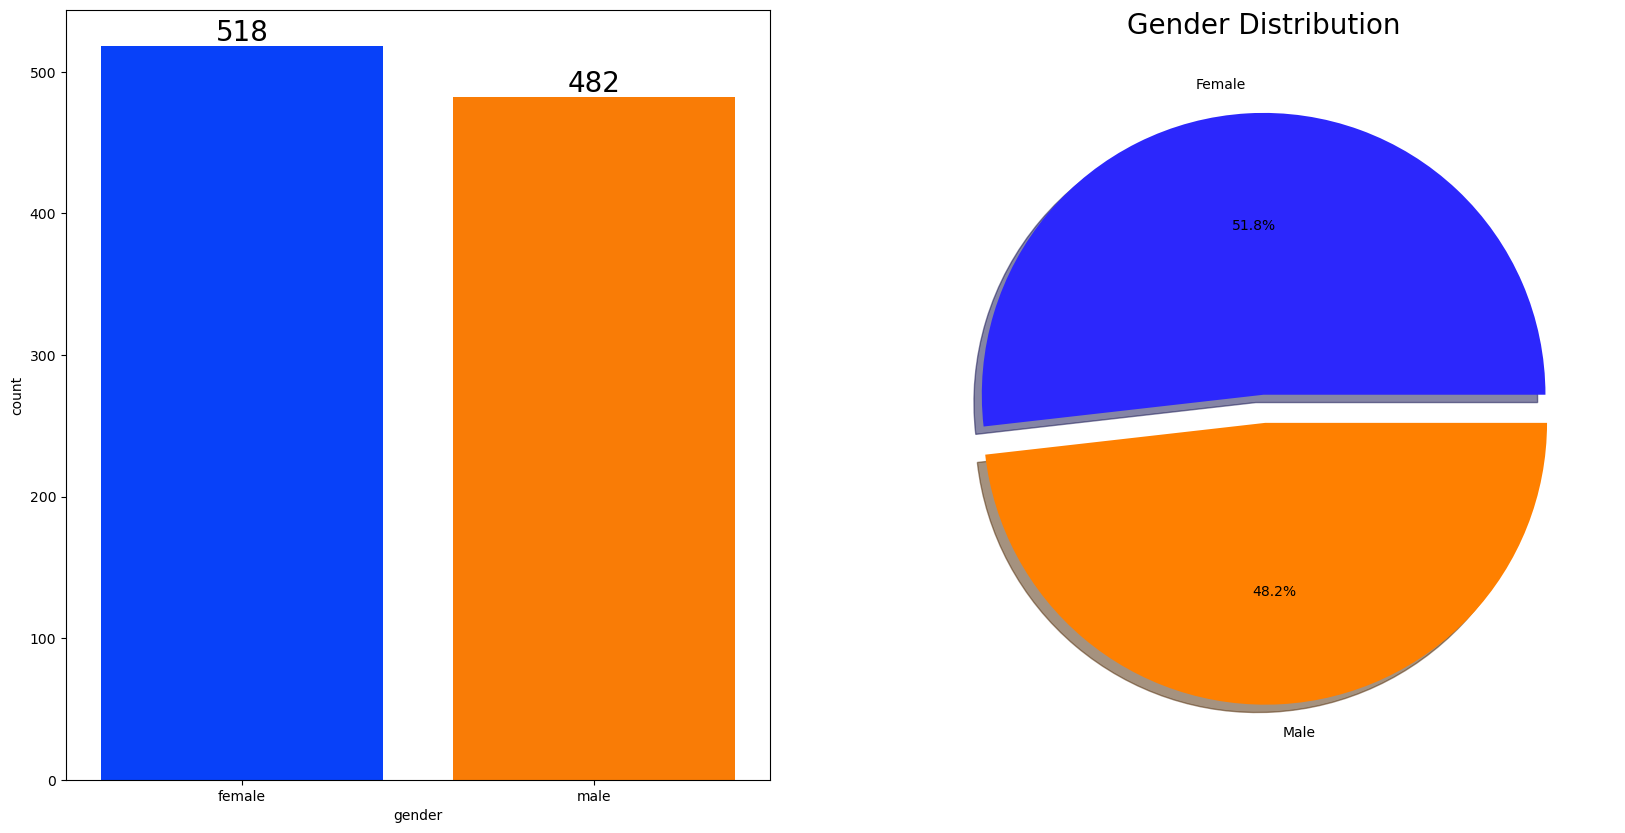

In [69]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Female', 'Male'], explode=[0, 0.1],
        autopct='%1.1f%%', shadow=True, colors=['#2C27FC', '#ff8000'])
plt.title('Gender Distribution', fontsize=20)

 
plt.show()

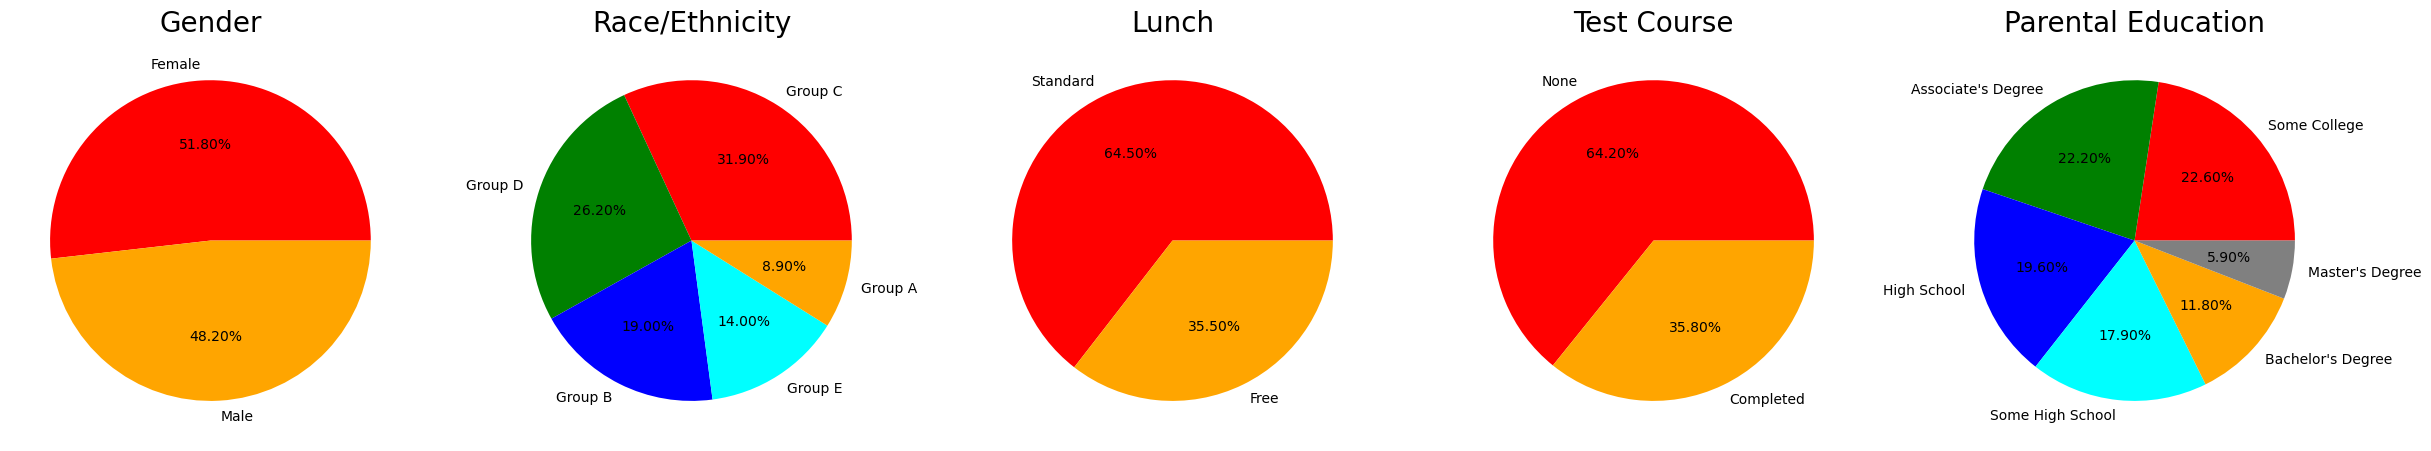

In [70]:
plt.rcParams['figure.figsize'] = (30, 12)

# Create a subplot with five pie charts side by side
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')


plt.grid()
plt.show()

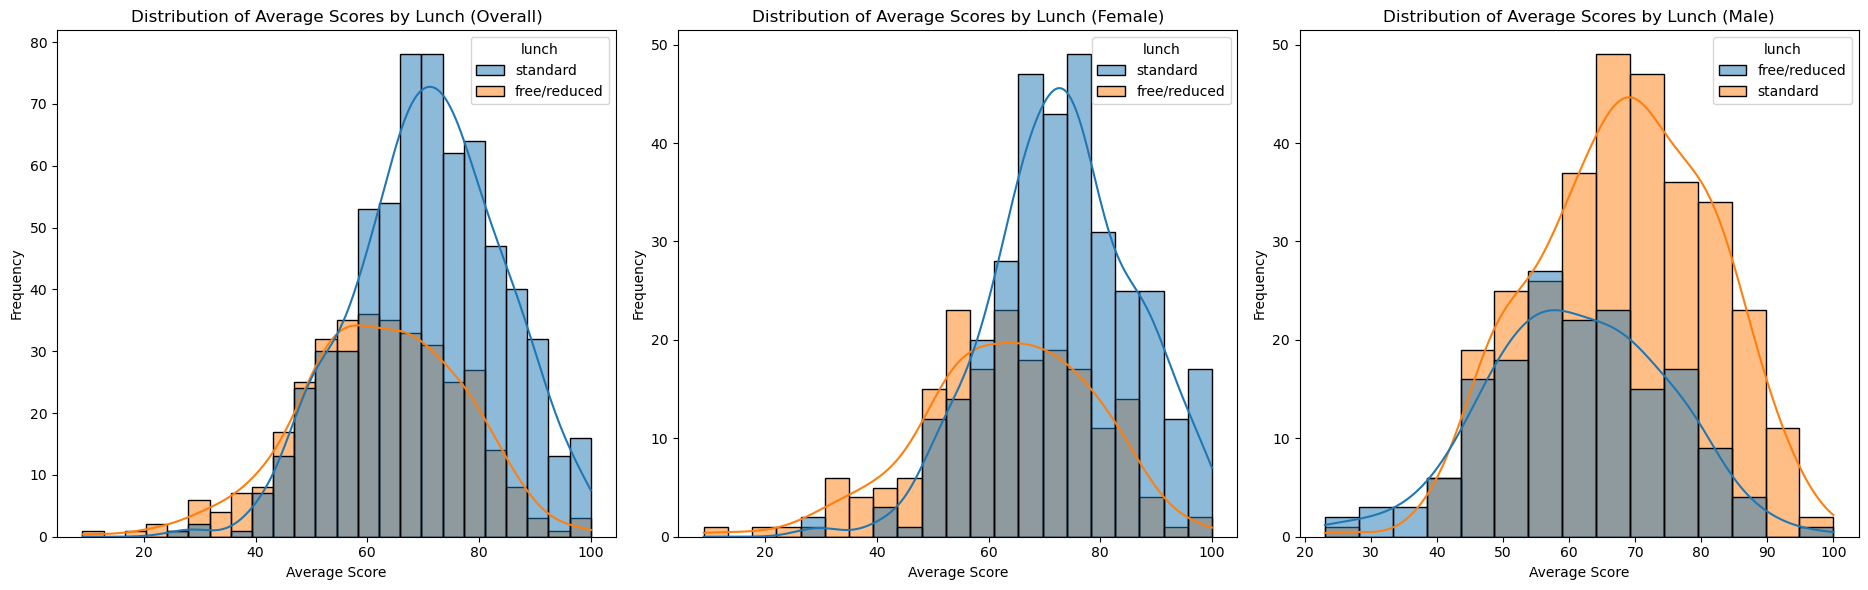

In [71]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='avg score', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Overall)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Female)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Male)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

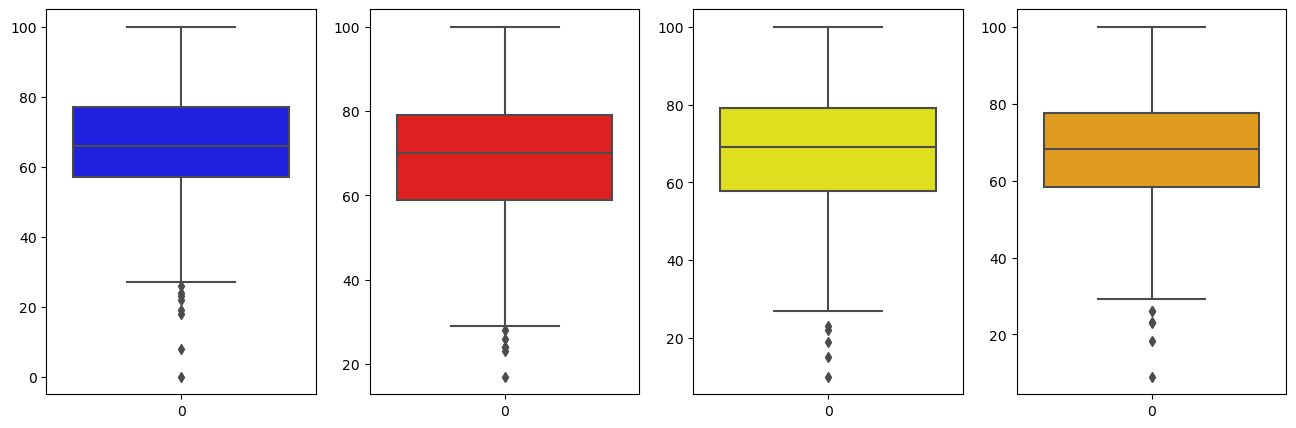

In [72]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='blue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='red')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg score'],color='orange')
plt.show()

In [74]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')